In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt



df = pd.read_csv("/kaggle/input/usda-national-nutrient-database/USDA.csv")

In [ ]:
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [ ]:
df.columns

Index(['ID', 'Description', 'Calories', 'Protein', 'TotalFat', 'Carbohydrate',
       'Sodium', 'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron',
       'Potassium', 'VitaminC', 'VitaminE', 'VitaminD'],
      dtype='object')

In [ ]:
df.shape

(7058, 16)

In [ ]:
food_names = df['Description']


In [ ]:
df.describe

<bound method NDFrame.describe of          ID                 Description  Calories  Protein  TotalFat  \
0      1001            BUTTER,WITH SALT     717.0     0.85     81.11   
1      1002    BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11   
2      1003        BUTTER OIL,ANHYDROUS     876.0     0.28     99.48   
3      1004                 CHEESE,BLUE     353.0    21.40     28.74   
4      1005                CHEESE,BRICK     371.0    23.24     29.68   
...     ...                         ...       ...      ...       ...   
7053  80200               FROG LEGS,RAW      73.0    16.40      0.30   
7054  83110             MACKEREL,SALTED     305.0    18.50     25.10   
7055  90240  SCALLOP,(BAY&SEA),CKD,STMD     111.0    20.54      0.84   
7056  90560                   SNAIL,RAW      90.0    16.10      1.40   
7057  93600            TURTLE,GREEN,RAW      89.0    19.80      0.50   

      Carbohydrate  Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  \
0             0.06   7

In [ ]:
df.isnull().sum()

ID                 0
Description        0
Calories           1
Protein            1
TotalFat           1
Carbohydrate       1
Sodium            84
SaturatedFat     301
Cholesterol      288
Sugar           1910
Calcium          136
Iron             123
Potassium        409
VitaminC         332
VitaminE        2720
VitaminD        2834
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

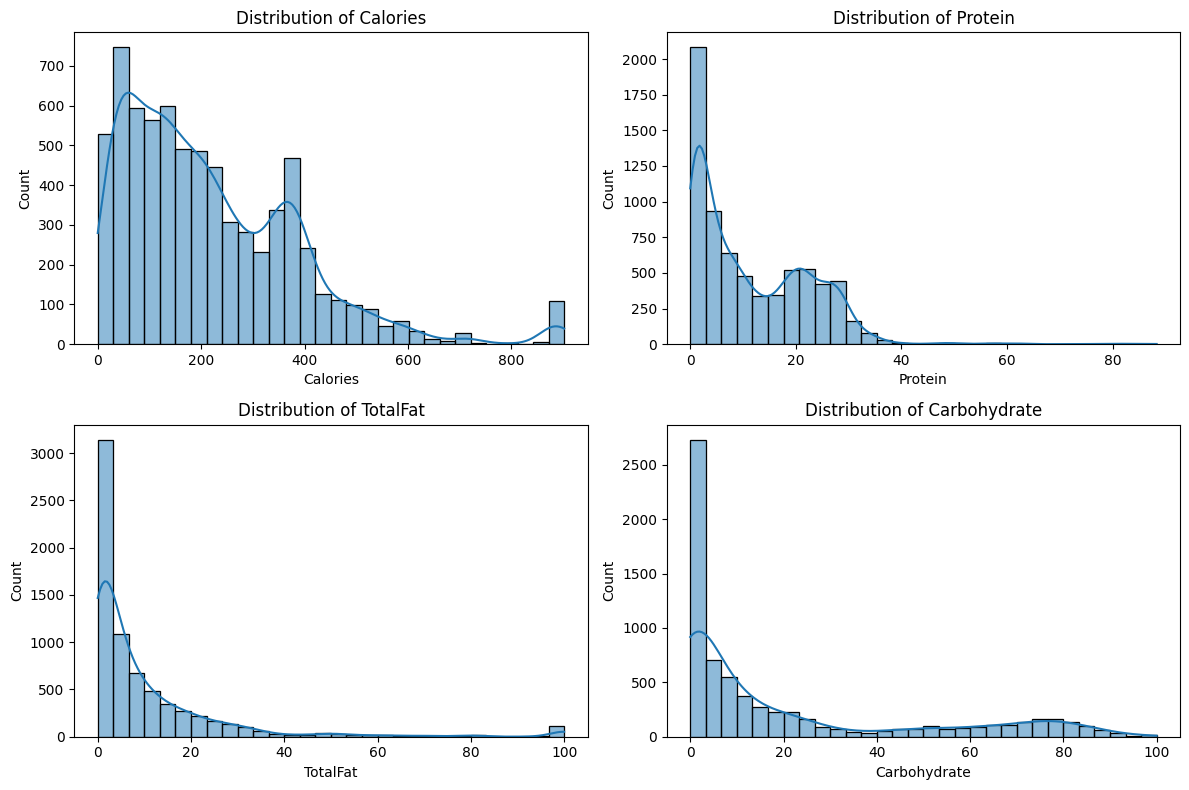

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # <--- مهم جداً

# افتراض إن عندك df جاهز وفيه الأعمدة
features = ["Calories", "Protein", "TotalFat", "Carbohydrate"]

plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


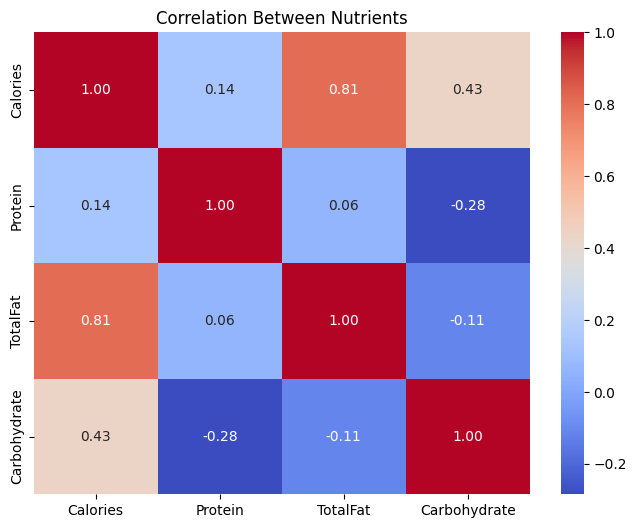

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Nutrients")
plt.show()


In [ ]:
# أعلى 10 أطعمة في البروتين
print(df[['Protein']].sort_values(by="Protein", ascending=False).head(10))

# أقل 10 أطعمة في السعرات
print(df[['Calories']].sort_values(by="Calories").head(10))


      Protein
4660    88.32
4549    87.75
4550    86.00
5660    85.60
6729    82.60
123     82.40
151     81.10
4511    80.69
4659    80.69
6804    77.27
      Calories
3962       0.0
4032       0.0
4033       0.0
3917       0.0
4041       0.0
4042       0.0
3930       0.0
4093       0.0
4054       0.0
4057       0.0


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:

df = df[['Calories','Protein','TotalFat','Carbohydrate','Iron','Calcium']]

# دالة لفحص الأوتلايرز باستخدام IQR
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).any()

# تعويض القيم المفقودة
for col in df.columns:
    if df[col].isnull().sum() > 0:  # لو فيه Missing
        if df[col].dtype in ['float64','int64']:  # بيانات رقمية
            if has_outliers(df[col]):
                # فيه أوتلايرز → استخدم الوسيط
                df[col].fillna(df[col].median(), inplace=True)
                print(f"{col}: تم التعويض بالوسيط (Median)")
            else:
                # مفيش أوتلايرز → استخدم المتوسط
                df[col].fillna(df[col].mean(), inplace=True)
                print(f"{col}: تم التعويض بالمتوسط (Mean)")
        else:
            # بيانات نصية → استخدم المنوال
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"{col}: تم التعويض بالمنوال (Mode)")


In [ ]:
print(df.columns.tolist())


['Calories', 'Protein', 'TotalFat', 'Carbohydrate', 'Iron', 'Calcium']


In [ ]:
# تنظيف أسماء الأعمدة
df.columns = df.columns.str.strip()         # يشيل المسافات من أول وآخر الاسم
df.columns = df.columns.str.replace(' ', '')  # يشيل أي مسافات جوه الاسم
df.columns = df.columns.str.lower()         # يحول كل الحروف لصغيرة

print(df.columns.tolist())  # تأكدي الأسماء بعد التنضيف


['calories', 'protein', 'totalfat', 'carbohydrate', 'iron', 'calcium']


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-12 20:48:25.608463: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7089 - loss: 0.5428 - val_accuracy: 0.9345 - val_loss: 0.1999
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9320 - loss: 0.1838 - val_accuracy: 0.9522 - val_loss: 0.1116
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1163 - val_accuracy: 0.9752 - val_loss: 0.0779
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0742 - val_accuracy: 0.9841 - val_loss: 0.0596
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0564 - val_accuracy: 0.9770 - val_loss: 0.0504
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9810 - loss: 0.0523 - val_accuracy: 0.9805 - val_loss: 0.0444
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0418 - val_accuracy: 0.9841 - val_loss: 0.0412
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9894 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 72367.4062 - mae: 211.3339 - val_loss: 46974.5078 - val_mae: 162.4611
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31020.6797 - mae: 123.4493 - val_loss: 2950.5142 - val_mae: 42.0361
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2104.7903 - mae: 35.3252 - val_loss: 966.7463 - val_mae: 22.4103
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 755.2567 - mae: 20.0897 - val_loss: 672.0297 - val_mae: 17.6382
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 662.3916 - mae: 16.8476 - val_loss: 539.3608 - val_mae: 14.7762
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 533.3395 - mae: 14.1415 - val_loss: 450.0150 - val_mae: 12.6539
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 476.8480 - mae: 12.3006 - val_loss: 395.9919 - val_mae: 11.1058
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 402.5330 - mae: 10.7522 - val_loss: 364.6058 - val_mae: 10.0514
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  if X.shape[0] < self.n_clusters:
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7dc6d417b9c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

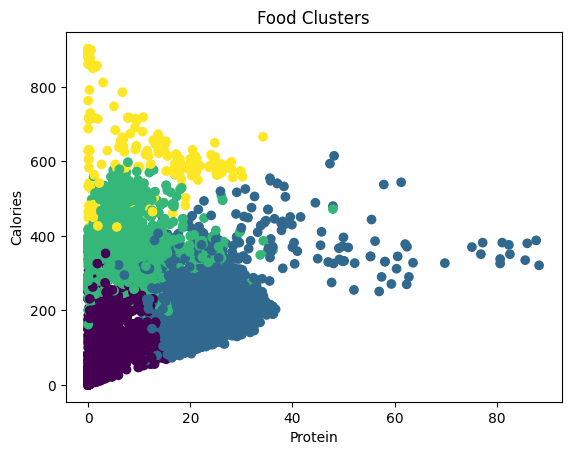

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3850 - loss: 0.7015 - val_accuracy: 0.6875 - val_loss: 0.6528
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6800 - loss: 0.6713 - val_accuracy: 0.7500 - val_loss: 0.6303
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8482 - loss: 0.6344 - val_accuracy: 0.8750 - val_loss: 0.6065
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8536 - loss: 0.6083 - val_accuracy: 0.8750 - val_loss: 0.5829
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9346 - loss: 0.5765 - val_accuracy: 0.9375 - val_loss: 0.5571
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9110 - loss: 0.5526 - val_accuracy: 0.9375 - val_loss: 0.5327
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9408 - loss: 0.5208 - val_accuracy: 0.8750 - val_loss: 0.5082
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9307 - loss: 0.4943 - val_accuracy: 0.8750 - val_loss: 0.4835
Epoch 9/50


In [ ]:

features = ['calories', 'protein', 'totalfat', 'carbohydrate', 'iron', 'calcium']
X = df[features]

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


y = ((X['calories'] < 200) & (X['protein'] > 5)).astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

clf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

clf_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


clf_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

# تقييم الموديل
loss, acc = clf_model.evaluate(X_test, y_test)
print(f"Classification Accuracy: {acc:.4f}")

# ------------------------------
# 3. Regression (Predict Calories)
X_reg = X[['protein', 'totalfat', 'carbohydrate']]
y_reg = X['calories']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scaling
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

# بناء موديل Keras للـ Regression
reg_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_r_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # output continuous value
])

reg_model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

# تدريب الموديل
reg_model.fit(X_train_r_scaled, y_train_r, epochs=50, batch_size=16, validation_split=0.1)

# تقييم الموديل
loss, mae = reg_model.evaluate(X_test_r_scaled, y_test_r)
print(f"Regression MAE: {mae:.4f}")

# ------------------------------
# 4. Clustering (KMeans) و Recommendation
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(df['protein'], df['calories'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Protein")
plt.ylabel("Calories")
plt.title("Food Clusters")
plt.show()

nn = NearestNeighbors(n_neighbors=6, metric='cosine').fit(X_scaled)

def recommend(food_name, df):
    if 'Description' in df.columns:
        idx = df.index[df['Description'].str.contains(food_name, case=False)]
        if len(idx) == 0:
            return "Food not found"
        i = idx[0]
        dist, ind = nn.kneighbors([X_scaled[i]], n_neighbors=6)
        recs = [df.iloc[j]['Description'] for j in ind[0] if j != i]
        return recs
    else:
        return "No Description column"

# مثال توصية
if 'Description' in df.columns:
    print("Recommendations for Lentils:", recommend("Lentils", df))

np.random.seed(42)
user_meals = pd.DataFrame({
    "calories": np.random.randint(1500, 3000, 200),
    "protein": np.random.randint(30, 120, 200),
    "iron": np.random.uniform(2, 20, 200),
    "calcium": np.random.uniform(200, 1200, 200)
})
user_meals["iron_deficiency"] = (user_meals["iron"] < 8).astype(int)

X_def = user_meals[['calories','protein','iron','calcium']]
y_def = user_meals['iron_deficiency']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_def, y_def, test_size=0.2, random_state=42, stratify=y_def
)

scaler_def = StandardScaler()
X_train_d_scaled = scaler_def.fit_transform(X_train_d)
X_test_d_scaled = scaler_def.transform(X_test_d)

def_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_d_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

def_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
def_model.fit(X_train_d_scaled, y_train_d, epochs=50, batch_size=16, validation_split=0.1)

loss, acc = def_model.evaluate(X_test_d_scaled, y_test_d)
print(f"Deficiency Prediction Accuracy: {acc:.4f}")
